In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [2]:
df = pd.read_csv('Smarket.csv', usecols=range(1,10), parse_dates=True)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
df.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [4]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


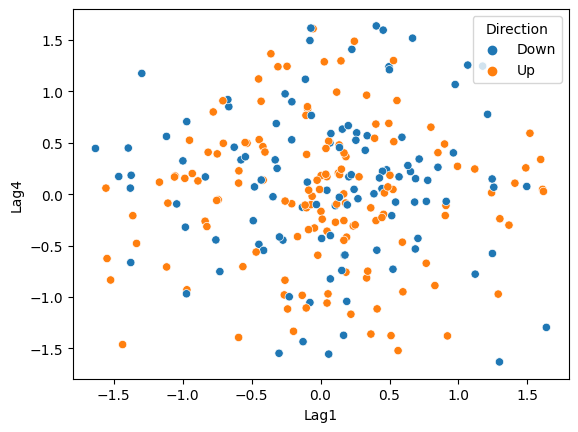

In [5]:
df2004 = df[df.Year==2004]
df2004 = df2004.reset_index(drop=True)
sns.scatterplot(data = df2004, x='Lag1', y='Lag4', hue='Direction')
plt.show()

In [6]:
Xtrain = np.array([df2004.iloc[:,1],df2004.iloc[:,2],df2004.iloc[:,3],df2004.iloc[:,4],df2004.iloc[:,5],df2004.iloc[:,6]])
Xtrain = Xtrain.T

y = df2004.Direction
temp = y.replace(to_replace="Up", value=1)
ytrain = temp.replace(to_replace="Down", value=0)

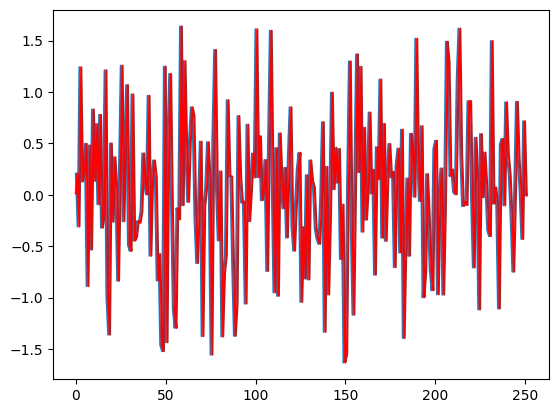

In [7]:
from turtle import color


plt.plot(Xtrain[:,0])
plt.plot(Xtrain[:,1],color='red')

<AxesSubplot: xlabel='n_data'>

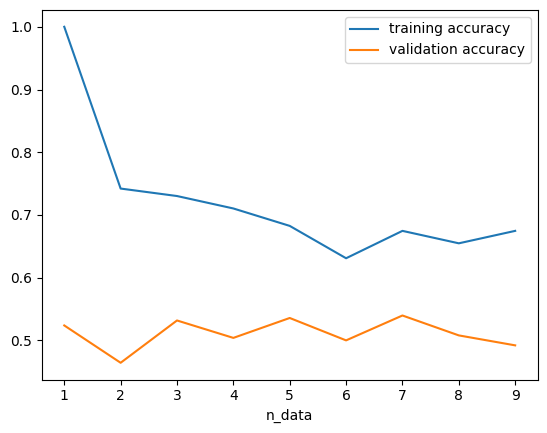

In [8]:
# model = knn(1)
# model.fit(Xtrain,ytrain)

n_data=[]
training_accuracy=[]
validation_accuracy=[]

# for n in range(1,10):
#     model = knn(n)
#     model.fit(Xtrain,ytrain)
#     n_data.append(n)
#     training_accuracy.append(model.score(Xtrain,ytrain))
#     validation_accuracy.append(model.score(Xtest,ytest))

# d = {'n_data': n_data, 'training accuracy': training_accuracy, 'validation accuracy': validation_accuracy}
# df = pd.DataFrame(data=d)

# f, ax = plt.subplots(1, 1)
# x_col='n_data'
# y_col = 'accuracy'

# ax.plot('n_data', 'training accuracy', data=df, color="blue", label="Training Accuracy", linestyle="-")
# ax.plot('n_data', 'validation accuracy', data=df, color="red", label="Validation Accuracy", linestyle="-")
# ax.legend()
# plt.xlabel('k-value')
# plt.ylabel('Accuracy')
# plt.title('Accuracy as a function of number of k-value')
# plt.gcf().autofmt_xdate()
# plt.show()

df2005 = df2005.reset_index(drop=True)


Xtest = np.array([df2005.iloc[:,1],df2005.iloc[:,2],df2005.iloc[:,3],df2005.iloc[:,4],df2005.iloc[:,5],df2005.iloc[:,6]])
Xtest = Xtest.T

y = df2005.Direction
temp = y.replace(to_replace="Up", value=1)
ytest = temp.replace(to_replace="Down", value=0)


for ln in range(1,20):
    for n in range(1,10):
        model = knn(n)
        model.fit(Xtrain,ytrain)
        n_data.append(n)
        training_accuracy.append(model.score(Xtrain,ytrain))
        validation_accuracy.append(model.score(Xtest,ytest))

d = {'n_data': n_data, 'training accuracy': training_accuracy, 'validation accuracy': validation_accuracy}
df = pd.DataFrame(data=d)

df.groupby(['n_data']).mean().plot()



    
